In [10]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 17 13:21:25 2018
@author: Ken

Modified by MinhKhang Nguyen
July 09 2020 3:04 PM
"""

'\nCreated on Sat Nov 17 13:21:25 2018\n@author: Ken\n\nModified by MinhKhang Nguyen\nJuly 09 2020 3:04 PM\n'

In [11]:
import pandas as pd 
import random as rnd
import numpy as np 
import matplotlib.pyplot as plt

In [12]:
gdf = pd.read_csv('regssdatacsv.csv')

In [13]:
gdf.columns

Index(['Row', 'Tm', 'Game', 'Date', 'Home/Away', 'Opp', 'Result', 'TeamPTS',
       'OpponentPTS', 'TeamFG', 'TeamFGA', 'TeamFGP', 'Team3P', 'Team3PA',
       'Team3PP', 'TeamFT', 'TeamFTA', 'TeamFTP', 'OpponentFG', 'OpponentFGA',
       'OpponentFGP', 'Opponent3P', 'Opponent3PA', 'Opponent3PP', 'OpponentFT',
       'OpponentFTA', 'OpponentFTP'],
      dtype='object')

In [14]:
DALdf = gdf[gdf.Tm == 'DAL']
SACdf = gdf[gdf.Tm == 'SAC']


In [15]:
DALdf.Date = DALdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
DALdf = DALdf[(DALdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore')) & (DALdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]

SACdf.Date = SACdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
SACdf = SACdf[(SACdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore'))& (SACdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]


TypeError: '>' not supported between instances of 'str' and 'Timestamp'

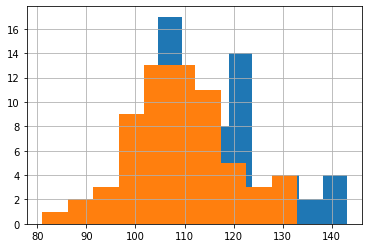

In [16]:
DALdf.TeamPTS.hist()
SACdf.TeamPTS.hist()

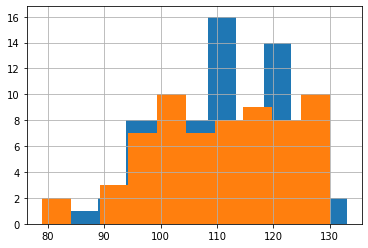

In [17]:
DALdf.OpponentPTS.hist()
SACdf.OpponentPTS.hist()

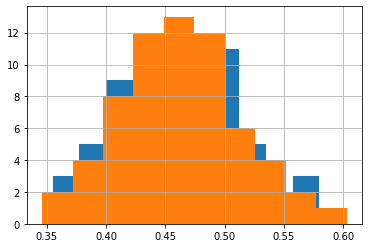

In [19]:
DALdf.TeamFGP.hist()
SACdf.TeamFGP.hist()

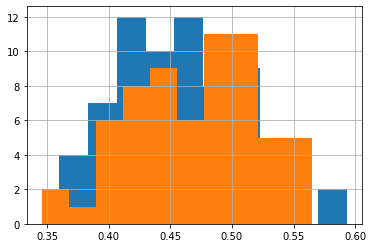

In [18]:
DALdf.OpponentFGP.hist()
SACdf.OpponentFGP.hist()

In [20]:
DALmeanpts = DALdf.TeamPTS.mean()
SACmeanpts = SACdf.TeamPTS.mean()
DALfgp = DALdf.TeamFGP.mean()
SACfgp = SACdf.TeamFGP.mean()
DALsdpts = DALdf.TeamPTS.std()
SACsdpts = SACdf.TeamPTS.std()

DALmeaSACp = DALdf.OpponentPTS.mean()
SACmeaSACp = SACdf.OpponentPTS.mean()
DALfgpopp = DALdf.OpponentFGP.mean()
SACfgpopp = SACdf.OpponentFGP.mean()
DALsdopp = DALdf.OpponentPTS.std()
SACsdopp = SACdf.OpponentPTS.std()

print("DAL Mean ", DALmeanpts)
print("DAL FG% ", DALfgp)
print("DAL Points Standard Deviation ", DALsdpts)
print("SAC Points Mean ", SACmeanpts)
print("SAC FG% ", SACfgp)
print("SAC Points Standard Deviation ", SACsdpts)

print("DAL OppPoints Mean ", DALmeaSACp)
print("DAL OppFG% Mean ", DALfgpopp)
print("DAL OppPoints SD ", DALsdopp)
print("SAC OppPoints Mean ", SACmeaSACp)
print("SAC OppFG% Mean ", SACfgpopp)
print("SAC OppPoints SD ", SACsdopp)

DAL Mean  116.35820895522389
DAL FG%  0.4626567164179105
DAL Points Standard Deviation  11.21511627702501
SAC Points Mean  108.984375
SAC FG%  0.46204687499999997
SAC Points Standard Deviation  10.493372341399027
DAL OppPoints Mean  110.31343283582089
DAL OppFG% Mean  0.45571641791044765
DAL OppPoints SD  10.53883001272377
SAC OppPoints Mean  110.90625
SAC OppFG% Mean  0.46865624999999994
SAC OppPoints SD  12.091868906450882


In [21]:
def gameSim():
    DALScore = (rnd.gauss(DALmeanpts,DALsdpts)+ rnd.gauss(SACmeaSACp,SACsdopp))/2
    SACScore = (rnd.gauss(SACmeanpts,SACsdpts)+ rnd.gauss(SACmeaSACp,SACsdopp))/2
    if int(round(DALScore)) > int(round(SACScore)):
        return 1
    elif int(round(DALScore)) < int(round(SACScore)):
        return -1
    else: return 0

In [22]:
def gAmesSim(ns):
    gamesout = []
    team1win = 0
    team2win = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
    print('DAL Win ', team1win/(team1win+team2win),'%')
    print('SAC Win ', team2win/(team1win+team2win),'%')
    return gamesout
        

In [23]:
gAmesSim(10000)

DAL Win  0.6191018211920529 %
SAC Win  0.380898178807947 %


[1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 0,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 0,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 0,
 1,
 -1,
 1,
 -1,
 0,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 0,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 